In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#cargan el conunto de datos
df = pd.read_csv("./sonar_dataset.csv", header=None) #carga los datos sin cabecera
df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
71,0.0036,0.0078,0.0092,0.0387,0.0530,0.1197,0.1243,0.1026,0.1239,0.0888,...,0.0119,0.0055,0.0035,0.0036,0.0004,0.0018,0.0049,0.0024,0.0016,R
35,0.0206,0.0132,0.0533,0.0569,0.0647,0.1432,0.1344,0.2041,0.1571,0.1573,...,0.0386,0.0147,0.0018,0.0100,0.0096,0.0077,0.0180,0.0109,0.0070,R
171,0.0179,0.0136,0.0408,0.0633,0.0596,0.0808,0.2090,0.3465,0.5276,0.5965,...,0.0123,0.0060,0.0187,0.0111,0.0126,0.0081,0.0155,0.0160,0.0085,M
172,0.0180,0.0444,0.0476,0.0698,0.1615,0.0887,0.0596,0.1071,0.3175,0.2918,...,0.0122,0.0114,0.0098,0.0027,0.0025,0.0026,0.0050,0.0073,0.0022,M
20,0.0473,0.0509,0.0819,0.1252,0.1783,0.3070,0.3008,0.2362,0.3830,0.3759,...,0.0193,0.0118,0.0064,0.0042,0.0054,0.0049,0.0082,0.0028,0.0027,R


In [4]:
#cramos los los datos de X y Y
X = df.drop(60, axis=1) #Eliminamos la última columna que contiene el dato de Si es metal o roca
y = df[60]
y.head()

0    R
1    R
2    R
3    R
4    R
Name: 60, dtype: object

In [5]:
y = pd.get_dummies(y, drop_first=True) #Convierte la variable categórica en variables ficticias/indicadoras.
y.sample(5) # R --> 1 y M --> 0

,R
158,0
12,1
14,1
133,0
8,1


In [6]:
from sklearn.model_selection import train_test_split #Nos permite dividir un dataset en dos bloques, típicamente bloques destinados al entrenamiento y validación del modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1) #Obtenemos el 25% de los datos de forma aleatoria para las pruebas

In [7]:
import tensorflow as tf
from tensorflow import keras

In [8]:
#agrupa una pila lineal de capas en un archivo tf.keras.Model.
model_1 = keras.Sequential([
    keras.layers.Dense(60, input_dim=60, activation='relu'), #entrada de los 60 parámetros
    keras.layers.Dense(30, activation='relu'), #primer capa oculta
    keras.layers.Dense(15, activation='relu'),#segunda capa oculta
    keras.layers.Dense(1, activation='sigmoid') #salda
])

model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
model_1_history = model_1.fit(X_train, y_train, epochs=150, batch_size=8,verbose=1,validation_data=(X_test, y_test))
#model_1_history = model_1.fit(X_train, y_train,
 #                             batch_size=batch_size,
 #                             epochs=epochs,
 #                             verbose=1,
 #                             validation_data=(X_test, y_test))

Epoch 1/150
20/20 [==============================] - 1s 17ms/step - loss: 0.6833 - accuracy: 0.5769 - val_loss: 0.6691 - val_accuracy: 0.5577
Epoch 2/150
20/20 [==============================] - 0s 5ms/step - loss: 0.6623 - accuracy: 0.6538 - val_loss: 0.6481 - val_accuracy: 0.6538
Epoch 3/150
20/20 [==============================] - 0s 4ms/step - loss: 0.6526 - accuracy: 0.6474 - val_loss: 0.6392 - val_accuracy: 0.6346
Epoch 4/150
20/20 [==============================] - 0s 5ms/step - loss: 0.6170 - accuracy: 0.7051 - val_loss: 0.6125 - val_accuracy: 0.6923
Epoch 5/150
20/20 [==============================] - 0s 4ms/step - loss: 0.5867 - accuracy: 0.7115 - val_loss: 0.5813 - val_accuracy: 0.6923
Epoch 6/150
20/20 [==============================] - 0s 5ms/step - loss: 0.5493 - accuracy: 0.7692 - val_loss: 0.5579 - val_accuracy: 0.6538
Epoch 7/150
20/20 [==============================] - 0s 5ms/step - loss: 0.5142 - accuracy: 0.7821 - val_loss: 0.5251 - val_accuracy: 0.6923
Epoch 8/150


# Modelo utilizando Normalización Batch

In [10]:
modeld_2 = keras.Sequential([
    keras.layers.Dense(60, input_dim=60, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1, activation='sigmoid')
])

modeld_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [11]:
model_2_history=modeld_2.fit(X_train, y_train, epochs=150, batch_size=8, verbose=1, validation_data=(X_test, y_test))

Epoch 1/150
20/20 [==============================] - 2s 15ms/step - loss: 0.8912 - accuracy: 0.4872 - val_loss: 0.6953 - val_accuracy: 0.4423
Epoch 2/150
20/20 [==============================] - 0s 5ms/step - loss: 0.6675 - accuracy: 0.6603 - val_loss: 0.6766 - val_accuracy: 0.6346
Epoch 3/150
20/20 [==============================] - 0s 5ms/step - loss: 0.5921 - accuracy: 0.6923 - val_loss: 0.6655 - val_accuracy: 0.7308
Epoch 4/150
20/20 [==============================] - 0s 4ms/step - loss: 0.5511 - accuracy: 0.7244 - val_loss: 0.6546 - val_accuracy: 0.7500
Epoch 5/150
20/20 [==============================] - 0s 4ms/step - loss: 0.5129 - accuracy: 0.7436 - val_loss: 0.6527 - val_accuracy: 0.6538
Epoch 6/150
20/20 [==============================] - 0s 5ms/step - loss: 0.4489 - accuracy: 0.8013 - val_loss: 0.6382 - val_accuracy: 0.6346
Epoch 7/150
20/20 [==============================] - 0s 4ms/step - loss: 0.3756 - accuracy: 0.8397 - val_loss: 0.6250 - val_accuracy: 0.6538
Epoch 8/150


# Visualización de la precisión

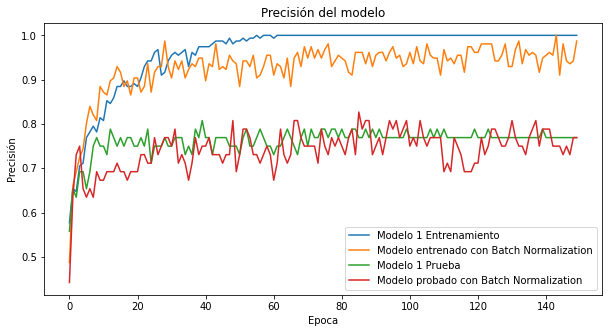

In [12]:
plt.figure(figsize=(10,5))
plt.plot(model_1_history.history['accuracy'])
plt.plot(model_2_history.history['accuracy'])
plt.plot(model_1_history.history['val_accuracy'])
plt.plot(model_2_history.history['val_accuracy'])
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Epoca')
plt.legend(['Modelo 1 Entrenamiento','Modelo entrenado con Batch Normalization', 
            'Modelo 1 Prueba', 'Modelo probado con Batch Normalization'],
           loc='lower right')